## Customer Segmention Notebook

In [1]:
#importing nesscery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
#reading Train and Test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# EDA

In [3]:
train = train_data.copy()
test = test_data.copy()

In [4]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None
                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      2595.381232    16.711696 

In [4]:
#Drop ID column
train_data.drop('ID', axis=1, inplace=True)
test_data.drop('ID', axis=1, inplace=True)

In [7]:
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Data Preprocessing

In [5]:
#split train Data into train and validation
X_train, X_val = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['Segmentation'])

In [9]:
X_train.isnull().sum()

Gender               0
Ever_Married       111
Age                  0
Graduated           59
Profession         106
Work_Experience    646
Spending_Score       0
Family_Size        264
Var_1               60
Segmentation         0
dtype: int64

In [19]:
#Know unique value at Profession column
X_train['Var_1'].unique()

array(['Cat_6', 'Cat_7', 'Cat_3', 'Cat_2', 'Cat_4', 'Cat_1', 'Cat_5', nan],
      dtype=object)

In [6]:
encoded_columns=["Gender","Spending_Score"]
#make label encoding for encoded columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in encoded_columns:
    X_train[col] = le.fit_transform(X_train[col])

In [7]:
X_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
917,0,No,32,Yes,Artist,9.0,2,1.0,Cat_6,A
3398,1,Yes,72,Yes,Entertainment,NaN,0,2.0,Cat_6,B
2045,0,No,33,Yes,Entertainment,1.0,2,4.0,Cat_6,B
8060,0,Yes,48,Yes,Artist,0.0,0,6.0,Cat_6,A
4604,0,Yes,28,No,Doctor,9.0,2,1.0,Cat_7,A


In [8]:
toBe_FilledWith_Mode_columns = ['Ever_Married','Graduated', 'Profession', 'Work_Experience']

In [9]:
#fill toBe_FilledWith_Mode_columns with mode
for col in toBe_FilledWith_Mode_columns:
    mode = X_train[col].mode()[0]
    X_train[col].fillna(mode, inplace=True)

/tmp/ipykernel_14360/2008254212.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(mode, inplace=True)


In [10]:
#fill Var_1
X_train['Var_1'].fillna(X_train['Var_1'].mode()[0], inplace=True)

/tmp/ipykernel_14360/1552245264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Var_1'].fillna(X_train['Var_1'].mode()[0], inplace=True)


In [11]:
X_train.isnull().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size        264
Var_1                0
Segmentation         0
dtype: int64

In [12]:
#rename var_1 to SubSegment
X_train.rename(columns={'Var_1': 'SubSegment'}, inplace=True)

In [13]:
X_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,SubSegment,Segmentation
917,0,No,32,Yes,Artist,9.0,2,1.0,Cat_6,A
3398,1,Yes,72,Yes,Entertainment,1.0,0,2.0,Cat_6,B
2045,0,No,33,Yes,Entertainment,1.0,2,4.0,Cat_6,B
8060,0,Yes,48,Yes,Artist,0.0,0,6.0,Cat_6,A
4604,0,Yes,28,No,Doctor,9.0,2,1.0,Cat_7,A


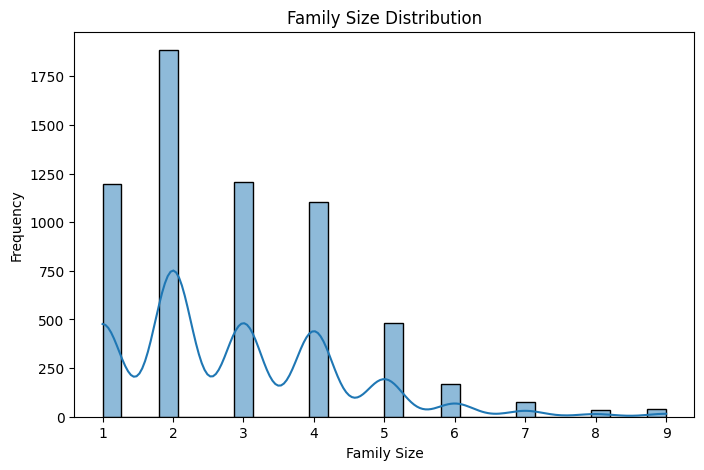

In [24]:
#plott Family_Size Distribution
plt.figure(figsize=(8, 5))
sns.histplot(X_train['Family_Size'], bins=30, kde=True)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

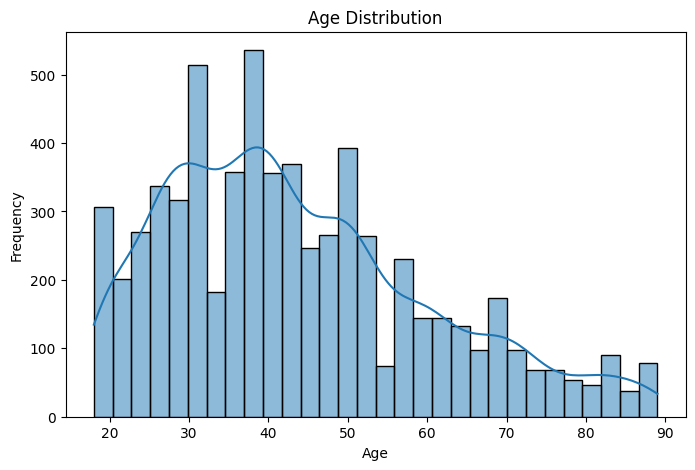

In [31]:
#plot Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(X_train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

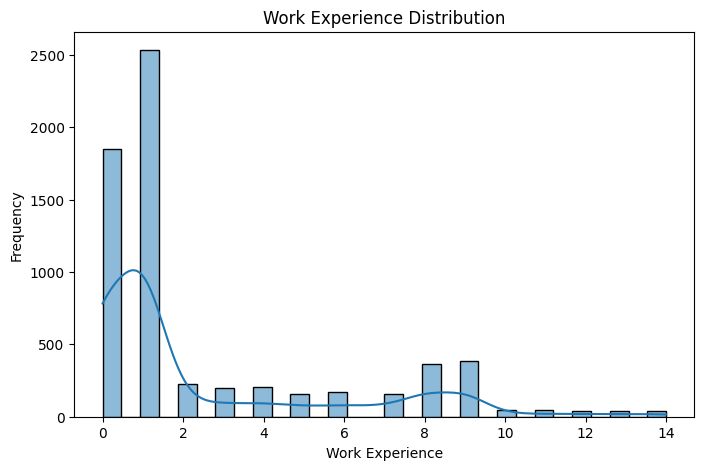

In [32]:
#plot Work_Experience Distribution
plt.figure(figsize=(8, 5))
sns.histplot(X_train['Work_Experience'], bins=30, kde=True)
plt.title('Work Experience Distribution')
plt.xlabel('Work Experience')
plt.ylabel('Frequency')
plt.show()

In [14]:
#fill Family_Size with median
X_train['Family_Size'].fillna(X_train['Family_Size'].median(), inplace=True)

/tmp/ipykernel_14360/3205472477.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Family_Size'].fillna(X_train['Family_Size'].median(), inplace=True)


In [15]:
X_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,SubSegment,Segmentation
917,0,No,32,Yes,Artist,9.0,2,1.0,Cat_6,A
3398,1,Yes,72,Yes,Entertainment,1.0,0,2.0,Cat_6,B
2045,0,No,33,Yes,Entertainment,1.0,2,4.0,Cat_6,B
8060,0,Yes,48,Yes,Artist,0.0,0,6.0,Cat_6,A
4604,0,Yes,28,No,Doctor,9.0,2,1.0,Cat_7,A


In [16]:
encoded_columns_after_filling=["Ever_Married","Graduated", "Profession", "SubSegment"]
#make label encoding for encoded columns after filling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in encoded_columns_after_filling:
    X_train[col] = le.fit_transform(X_train[col])

In [17]:
X_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,SubSegment,Segmentation
917,0,0,32,1,0,9.0,2,1.0,5,A
3398,1,1,72,1,3,1.0,0,2.0,5,B
2045,0,0,33,1,3,1.0,2,4.0,5,B
8060,0,1,48,1,0,0.0,0,6.0,5,A
4604,0,1,28,0,1,9.0,2,1.0,6,A


In [18]:
#encode Segmentation
X_train['Segmentation'] = le.fit_transform(X_train['Segmentation'])

In [19]:
X_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,SubSegment,Segmentation
917,0,0,32,1,0,9.0,2,1.0,5,0
3398,1,1,72,1,3,1.0,0,2.0,5,1
2045,0,0,33,1,3,1.0,2,4.0,5,1
8060,0,1,48,1,0,0.0,0,6.0,5,0
4604,0,1,28,0,1,9.0,2,1.0,6,0


In [20]:
#start use kmeans to segment customers
#scale the data
scaler = StandardScaler()
scaled_column=["Work_Experience","Age","Family_Size"]
X_scaled = scaler.fit_transform(X_train[scaled_column])

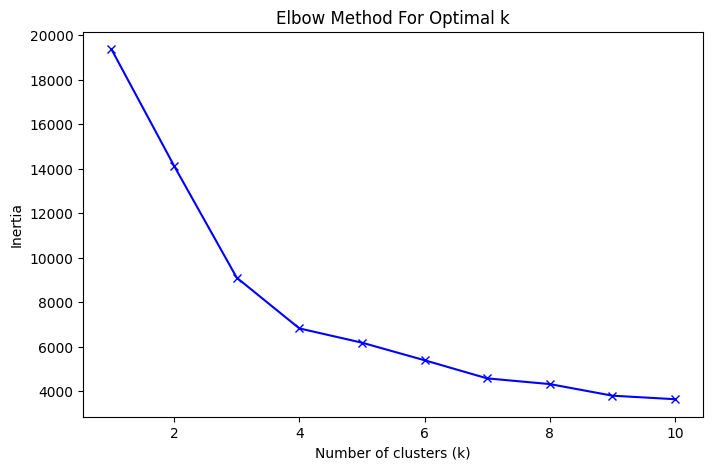

In [21]:
#start kmeans with different k to find the best k using elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
#plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

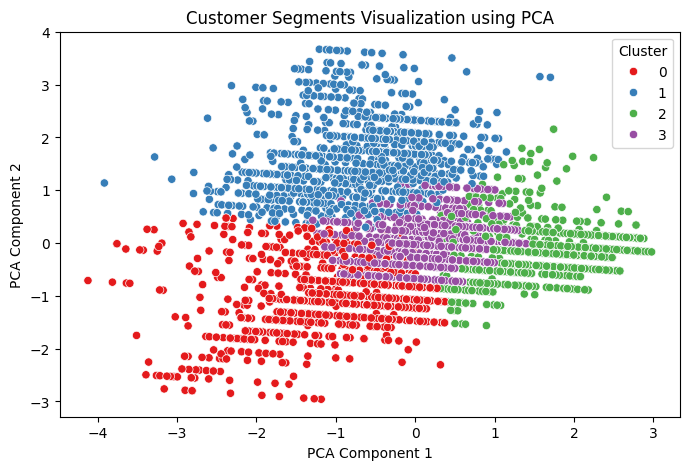

In [35]:
#set k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
#add cluster labels to the original data
X_train['Cluster'] = kmeans.labels_
X_train.head()
#visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_train['Cluster'], palette='Set1')
plt.title('Customer Segments Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [36]:
#Display Siloute score
sil_score = silhouette_score(X_scaled, X_train['Cluster'])
print(f'Silhouette Score for k=4: {sil_score}')

Silhouette Score for k=4: 0.3558769871851824


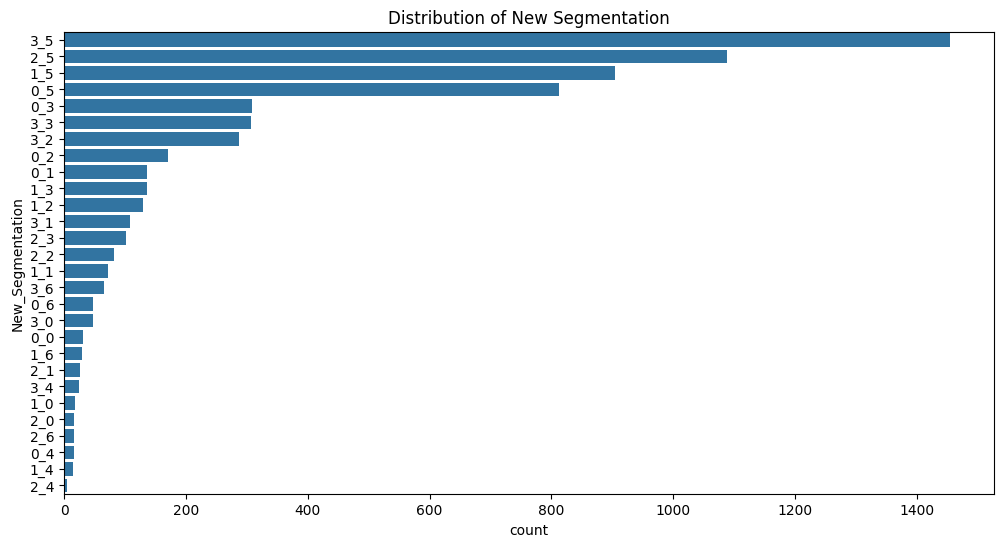

Text(0, 0.5, 'Count')

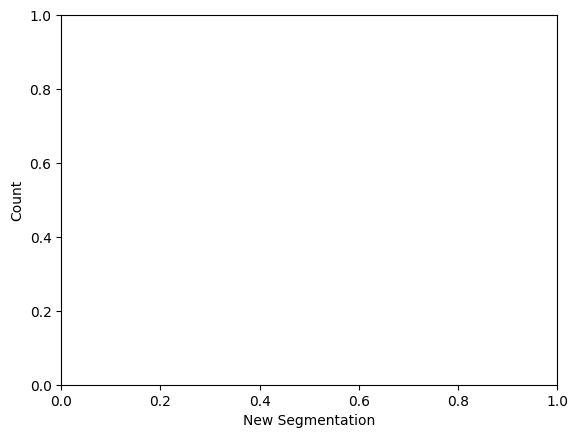

In [40]:
#use subsegment to column to make new segmentation cluster inside each cluster
X_train['New_Segmentation'] = X_train['Cluster'].astype(str) + '_'+ X_train['SubSegment'].astype(str)
X_train.head()
#check the number of unique values in New_Segmentation
X_train['New_Segmentation'].nunique()
#check the distribution of New_Segmentation
plt.figure(figsize=(12, 6))
sns.countplot(y=X_train['New_Segmentation'], order=X_train['New_Segmentation'].value_counts().index)
plt.title('Distribution of New Segmentation')   
plt.show()
plt.xlabel('New Segmentation')
plt.ylabel('Count')

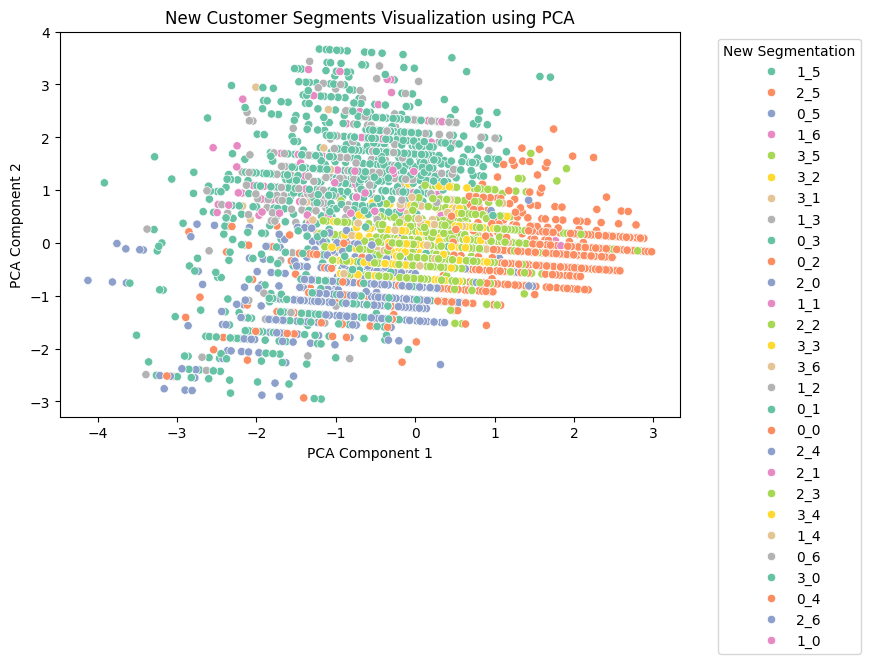

In [42]:
#Draw new segmention scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_train['New_Segmentation'], palette='Set2')
plt.title('New Customer Segments Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='New Segmentation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

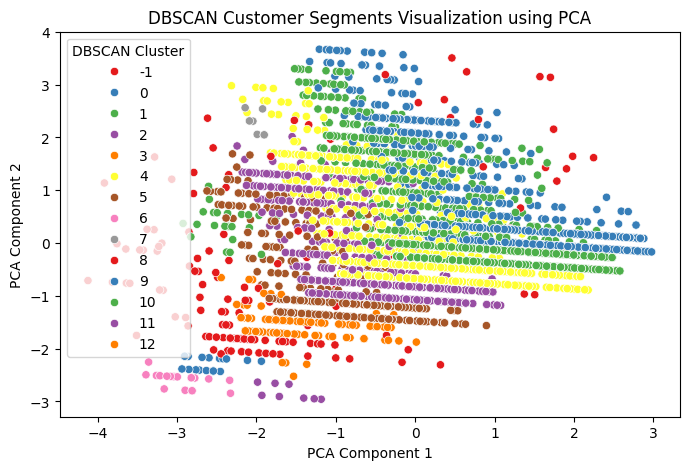

In [37]:
#Try DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
X_train['DBSCAN_Cluster'] = dbscan.labels_
#visualize DBSCAN clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_train['DBSCAN_Cluster'], palette='Set1')
plt.title('DBSCAN Customer Segments Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='DBSCAN Cluster')
plt.show()

## Building PipeLine of Data

In [38]:
#create pipeline to make all same preprocessing steps for X_val and test data
from sklearn.pipeline import Pipeline
#import column transformer
from sklearn.compose import ColumnTransformer